In [1]:
#load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset History
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# 1st step - Read & Describe the dataset

In [2]:
df = pd.read_csv ('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
df['Stay_In_Current_City_Years'] = pd.to_numeric(df['Stay_In_Current_City_Years'],errors='coerce')
#coerce will insert NS values for any invalid exception

df['Age']= df['Age'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null int64
City_Category                 550068 non-null category
Stay_In_Current_City_Years    465342 non-null float64
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: category(3), float64(3), int64(5), object(1)
memory usage: 39.3+ MB


In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
550063    False
550064    False
550065    False
550066    False
550067    False
Length: 550068, dtype: bool

## 2nd step – Data cleaning

In [10]:
# Drop User_ID columns : not contribute to the data set
df_c0 = df.drop('User_ID', axis=1)
df_c0.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,NaN,0,8,NaN,NaN,7969


In [11]:
# rename the columns.
df_c1 = df_c0.rename({'City_Category':'City' , 'Stay_In_Current_City_Years':'Years_in_city' , 'Product_Category_1' : 'PC_1' , 'Product_Category_2': 'PC_2', 'Product_Category_3':'PC_3'}, axis=1)
df_c1.head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,0-17,10,A,2.0,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2.0,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2.0,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,NaN,0,8,NaN,NaN,7969


In [12]:
df_c1.Age.unique()

[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Categories (7, object): [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]

In [13]:
df_c1['Age'] = df_c1['Age'].map({'0-17':'child', '18-25':'Teenage' , '26-35':'Adult', '36-45':'Adult' , '46-50':'Adult', '51-55':'Old', '55+':'Old'})
df_c1.head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,child,10,A,2.0,0,3,NaN,NaN,8370
1,P00248942,F,child,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,child,10,A,2.0,0,12,NaN,NaN,1422
3,P00085442,F,child,10,A,2.0,0,12,14.0,NaN,1057
4,P00285442,M,Old,16,C,NaN,0,8,NaN,NaN,7969


In [18]:
df_age = df_c1.groupby(['Age'])
df_age.mean()

,Occupation,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
Age,,,,,,,
Adult,8.248145,1.495011,0.434153,5.419136,9.897595,12.711992,9270.382613
Old,9.058312,1.402490,0.687993,5.878893,10.345992,13.121249,9463.661678
Teenage,6.736384,1.400457,0.211880,5.111088,9.470278,12.391142,9169.663606
child,8.761025,1.510781,0.000000,5.083764,9.030334,11.845885,8933.464640


In [19]:
df_gender = df_c1.groupby(['Gender'])
df_gender.mean()

,Occupation,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
Gender,,,,,,,
F,6.74054,1.480399,0.419619,5.717714,10.009166,12.453556,8734.565765
M,8.51475,1.464486,0.406386,5.301512,9.788729,12.730699,9437.526040


## 3rd step - Visualise data distribution : DETECT OUTLIER

In [25]:
## Descriptive statistics: 
df_c1['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

In [65]:
## Numerical feature
df_c1['Purchase'].kurtosis()

-0.3383775655851702

In [66]:
df_c1['Purchase'].skew()

0.6001400037087128

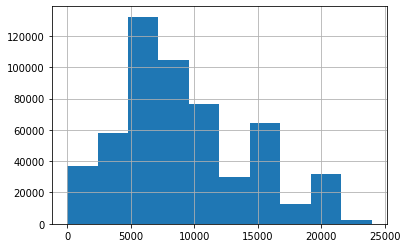

In [26]:
## Histogram : 
df_c1['Purchase'].hist()

In [27]:
## Box-Plot
df_box = df_c1.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x20c1c448>,
 'caps': [<matplotlib.lines.Line2D at 0x20c18208>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c1fa48>],
 'medians': [<matplotlib.lines.Line2D at 0x20c10248>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c0c048>],
 'means': []}

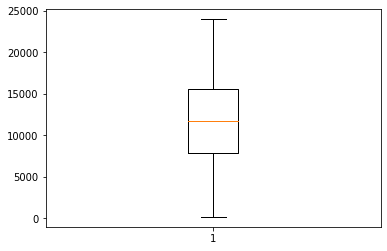

In [39]:
plt.boxplot(df_box['Purchase'])

In [68]:
df_c1['PC_1'].kurtosis()

1.2347569716913842

In [69]:
df_c1['PC_1'].skew()

1.0257349338538029

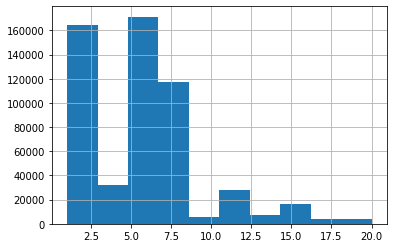

In [40]:
df_c1['PC_1'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1a3a5448>,
 'caps': [<matplotlib.lines.Line2D at 0x1a315cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a3b7288>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2bcc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2981c8>],
 'means': []}

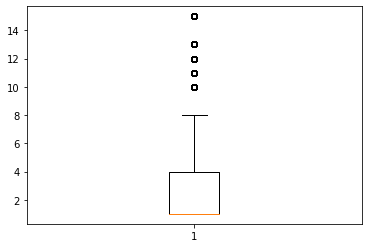

In [41]:
plt.boxplot(df_box['PC_1'])

In [70]:
df_c1['Occupation'].kurtosis()

-1.21611364874086

In [71]:
df_c1['Occupation'].skew()

0.40014010986184784

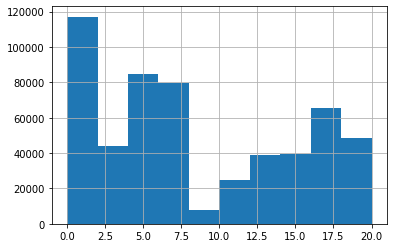

In [42]:
df_c1['Occupation'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x206a9fc8>,
 'caps': [<matplotlib.lines.Line2D at 0x206b0548>,
 'boxes': [<matplotlib.lines.Line2D at 0x206a4ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x206b7808>],
 'fliers': [<matplotlib.lines.Line2D at 0x206ba748>],
 'means': []}

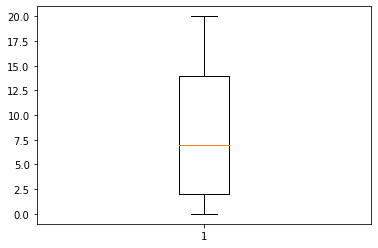

In [43]:
plt.boxplot(df_box.Occupation)

## Univariate Analysis for categorical feature

In [44]:
## BAR Chart  
df_c1['Age'].value_counts()

Adult      375301
Teenage     99660
Old         60005
child       15102
Name: Age, dtype: int64

In [45]:
age_counts = df_c1['Age'].value_counts()
ages = age_counts.index
count = age_counts.values
plt.figure(figsize=(1, 5))

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<BarContainer object of 4 artists>

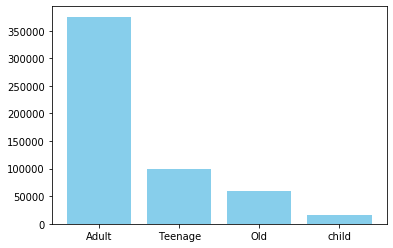

In [46]:
plt.bar(ages, count, color='skyblue')

([<matplotlib.patches.Wedge at 0x207f9d88>,
 [Text(-0.5960499816069655, 0.9245130715281078, 'Adult'),
  Text(0.1575218405576182, -1.0886628815879325, 'Teenage'),
  Text(0.9572087192946183, -0.5419884387201972, 'Old'),
  Text(1.0959108724359738, -0.09475948330707033, 'child')],
 [Text(-0.3251181717856175, 0.5042798571971496, '68.2%'),
  Text(0.085921003940519, -0.5938161172297812, '18.1%'),
  Text(0.5221138468879736, -0.2956300574837439, '10.9%'),
  Text(0.5977695667832583, -0.05168699089476563, '2.7%')])

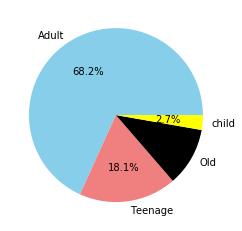

In [47]:
plt.pie(count, labels= ages , autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'black', 'yellow'])

In [48]:
gender_counts = df_c1['Gender'].value_counts()
gender = gender_counts.index
count1 = gender_counts.values
plt.figure(figsize=(1,5))

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<BarContainer object of 2 artists>

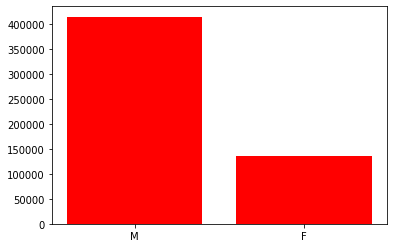

In [49]:
plt.bar(gender, count1, color = 'red')

([<matplotlib.patches.Wedge at 0x2091c4c8>,
 [Text(-0.785367774085001, 0.7701931312526561, 'M'),
  Text(0.7853677019743126, -0.7701932047840901, 'F')],
 [Text(-0.42838242222818235, 0.42010534431963054, '75.3%'),
  Text(0.42838238289507957, -0.42010538442768547, '24.7%')])

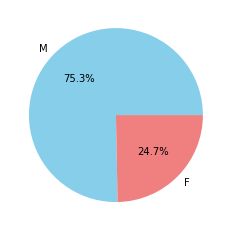

In [50]:
plt.pie(count1, labels= gender , autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

In [51]:
city_count = df_c1['City'].value_counts()
city = city_count.index
count2= city_count.values
plt.figure(figsize=(1,5))

<Figure size 72x360 with 0 Axes>

<Figure size 72x360 with 0 Axes>

<BarContainer object of 3 artists>

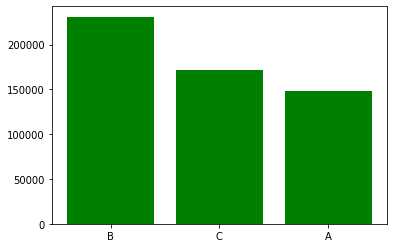

In [52]:
plt.bar(city, count2, color = 'green')

([<matplotlib.patches.Wedge at 0x20a209c8>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42.0%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31.1%'),
  Text(0.3988350646218405, -0.4482528206582668, '26.9%')])

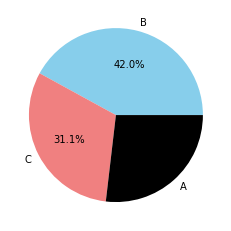

In [53]:
plt.pie(count2, labels= city , autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'black'])

In [61]:
df_c1['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00012942       1
P00143242       1
P00204042       1
P00060742       1
P00013842       1
Name: Product_ID, Length: 3631, dtype: int64

## Missing value : Treating the outliers

In [74]:
df_c1.isnull().sum()

Product_ID             0
Gender                 0
Age                    0
Occupation             0
City                   0
Years_in_city      84726
Marital_Status         0
PC_1                   0
PC_2              173638
PC_3              383247
Purchase               0
dtype: int64

In [75]:
df_c1.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City', 'Years_in_city',
       'Marital_Status', 'PC_1', 'PC_2', 'PC_3', 'Purchase'],
      dtype='object')

In [76]:
df_c1[df_c1.isnull().any(axis=1)].head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,child,10,A,2.0,0,3,NaN,NaN,8370
2,P00087842,F,child,10,A,2.0,0,12,NaN,NaN,1422
3,P00085442,F,child,10,A,2.0,0,12,14.0,NaN,1057
4,P00285442,M,Old,16,C,NaN,0,8,NaN,NaN,7969
5,P00193542,M,Adult,15,A,3.0,0,1,2.0,NaN,15227


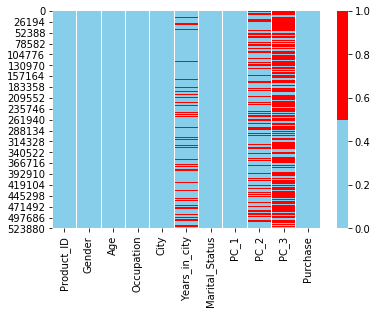

In [77]:
cols = df_c1.columns
colors = ['skyblue' ,'red']
#skyblue stands sfor missing value
sns.heatmap(df_c1[cols].isnull(), cmap=sns.color_palette(colors))

In [78]:
df_c1.notnull().sum()

Product_ID        550068
Gender            550068
Age               550068
Occupation        550068
City              550068
Years_in_city     465342
Marital_Status    550068
PC_1              550068
PC_2              376430
PC_3              166821
Purchase          550068
dtype: int64

## Impute the missing:  

In [79]:
med = df_c1['Years_in_city'].median()
print(med)

1.0


In [80]:
df_c1['Years_in_city']=df_c1[['Years_in_city']].fillna(med)
df_c1.head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,child,10,A,2.0,0,3,NaN,NaN,8370
1,P00248942,F,child,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,child,10,A,2.0,0,12,NaN,NaN,1422
3,P00085442,F,child,10,A,2.0,0,12,14.0,NaN,1057
4,P00285442,M,Old,16,C,1.0,0,8,NaN,NaN,7969


In [81]:
df_c1['PC_3']=df_c1[['PC_3']].fillna(0)
df_c1.head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,child,10,A,2.0,0,3,NaN,0.0,8370
1,P00248942,F,child,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,child,10,A,2.0,0,12,NaN,0.0,1422
3,P00085442,F,child,10,A,2.0,0,12,14.0,0.0,1057
4,P00285442,M,Old,16,C,1.0,0,8,NaN,0.0,7969


In [82]:
df_c1['PC_2']=df_c1[['PC_2']].fillna(0)
df_c1.head()

,Product_ID,Gender,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase
0,P00069042,F,child,10,A,2.0,0,3,0.0,0.0,8370
1,P00248942,F,child,10,A,2.0,0,1,6.0,14.0,15200
2,P00087842,F,child,10,A,2.0,0,12,0.0,0.0,1422
3,P00085442,F,child,10,A,2.0,0,12,14.0,0.0,1057
4,P00285442,M,Old,16,C,1.0,0,8,0.0,0.0,7969


In [83]:
df_c1.isnull().sum()

Product_ID        0
Gender            0
Age               0
Occupation        0
City              0
Years_in_city     0
Marital_Status    0
PC_1              0
PC_2              0
PC_3              0
Purchase          0
dtype: int64

## 4th step - Calculate and visualise: Correlations (relationship) between variables, scatter plot

In [122]:
col_1 = df_c1['PC_1']
col_2 = df_c1['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

-0.3

In [121]:
col_1 = df_c1['PC_2']
col_2 = df_c1['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

0.1

In [123]:
col_1 = df_c1['PC_3']
col_2 = df_c1['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

0.3

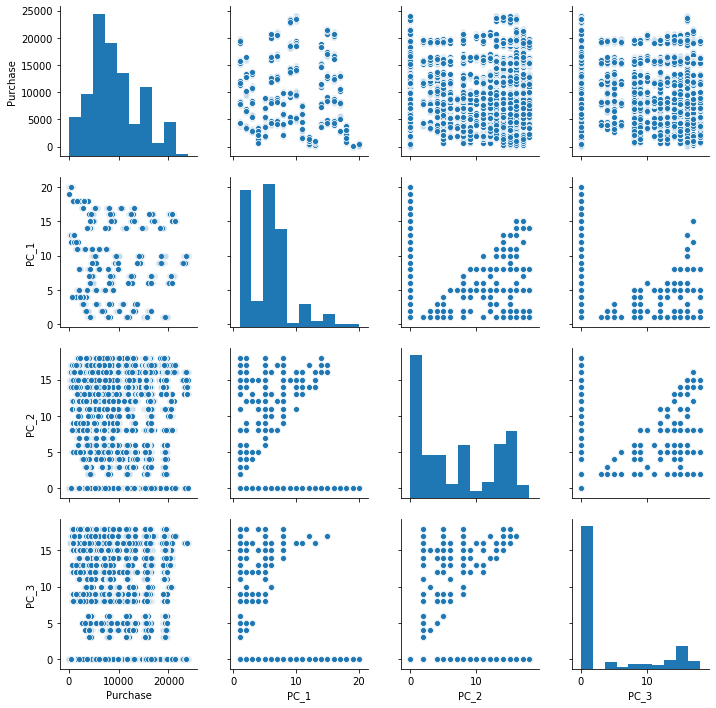

In [90]:
ci = ['Purchase','PC_1', 'PC_2','PC_3']
subset_df = df_c1[ci]
sns.pairplot(subset_df)

## Data Transformation:  

In [92]:
df_c2 = pd.get_dummies(df_c1, columns= ['Gender'])
df_c2.head()

,Product_ID,Age,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase,Gender_F,Gender_M
0,P00069042,child,10,A,2.0,0,3,0.0,0.0,8370,1,0
1,P00248942,child,10,A,2.0,0,1,6.0,14.0,15200,1,0
2,P00087842,child,10,A,2.0,0,12,0.0,0.0,1422,1,0
3,P00085442,child,10,A,2.0,0,12,14.0,0.0,1057,1,0
4,P00285442,Old,16,C,1.0,0,8,0.0,0.0,7969,0,1


In [101]:
df_c3 = pd.get_dummies(df_c2, columns= ['Age'])
df_c3.head()

,Product_ID,Occupation,City,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase,Gender_F,Gender_M,Age_Adult,Age_Old,Age_Teenage,Age_child
0,P00069042,10,A,2.0,0,3,0.0,0.0,8370,1,0,0,0,0,1
1,P00248942,10,A,2.0,0,1,6.0,14.0,15200,1,0,0,0,0,1
2,P00087842,10,A,2.0,0,12,0.0,0.0,1422,1,0,0,0,0,1
3,P00085442,10,A,2.0,0,12,14.0,0.0,1057,1,0,0,0,0,1
4,P00285442,16,C,1.0,0,8,0.0,0.0,7969,0,1,0,1,0,0


In [189]:
df_c4 = pd.get_dummies(df_c3, columns= ['City'])
df_c4.head()

,Product_ID,Occupation,Years_in_city,Marital_Status,PC_1,PC_2,PC_3,Purchase,Gender_F,Gender_M,Age_Adult,Age_Old,Age_Teenage,Age_child,City_A,City_B,City_C
0,P00069042,10,2.0,0,3,0.0,0.0,8370,1,0,0,0,0,1,1,0,0
1,P00248942,10,2.0,0,1,6.0,14.0,15200,1,0,0,0,0,1,1,0,0
2,P00087842,10,2.0,0,12,0.0,0.0,1422,1,0,0,0,0,1,1,0,0
3,P00085442,10,2.0,0,12,14.0,0.0,1057,1,0,0,0,0,1,1,0,0
4,P00285442,16,1.0,0,8,0.0,0.0,7969,0,1,0,1,0,0,0,0,1


In [191]:
# Combine Cloumns
df_c4['Married_Female'] = (df_c4['Gender_F'] == 1) & (df_c4['Marital_Status'] == 1)
df_c4['Married_Female'] = df_c4['Married_Female'].astype(int)

In [192]:
df_c4['Married_Male'] = (df_c4['Gender_M'] == 1) & (df_c4['Marital_Status'] == 1)
df_c4['Married_Male'] = df_c4['Married_Male'].astype(int)

In [193]:
df_c4 = df_c4.drop(['Gender_F', 'Marital_Status' , 'Gender_M' ], axis=1)

In [194]:
df_c4.shape

(550068, 16)

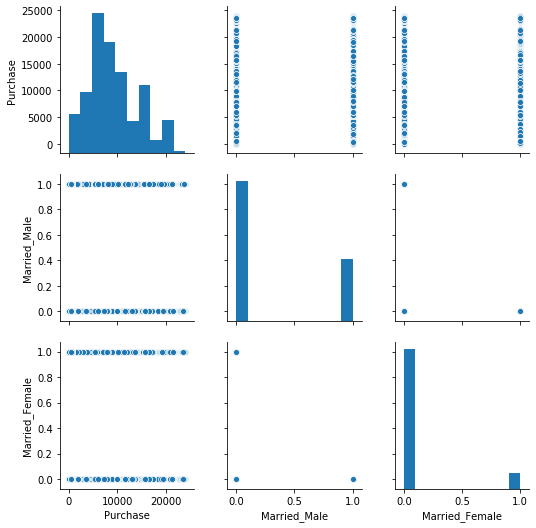

In [211]:
ci_1 = ['Purchase','Married_Male','Married_Female']
subset_df1 = df_c4[ci_1]
sns.pairplot(subset_df1)

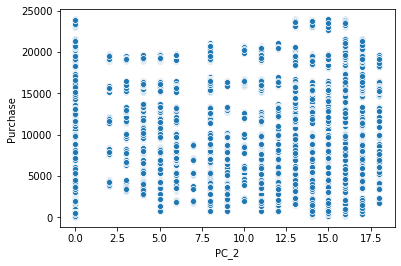

In [208]:
sns.scatterplot(data=df_c4, x='PC_2', y='Purchase')

In [195]:
col_1 = df_c4['Married_Female']
col_2 = df_c3['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

-0.0

In [196]:
col_1 = df_c4['Married_Male']
col_2 = df_c3['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

0.0

In [199]:
col_1 = df_c3['Age_Adult']
col_2 = df_c3['Purchase']
CoRelation = col_1.corr(col_2, method='pearson')
round(CoRelation, 1)

0.0